In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torchvision import transforms

# Define path to your sandbox images
# Update this path to where you unzipped your Kaggle dataset
SANDBOX_DIR = '../data/sandbox' 

print(f"Checking for images in: {SANDBOX_DIR}")
if os.path.exists(SANDBOX_DIR):
    # Count images (looking for png, jpg, jpeg)
    image_files = glob.glob(f"{SANDBOX_DIR}/**/*.png", recursive=True) + \
                  glob.glob(f"{SANDBOX_DIR}/**/*.jpg", recursive=True) + \
                  glob.glob(f"{SANDBOX_DIR}/**/*.jpeg", recursive=True)
    print(f"Found {len(image_files)} images.")
    if len(image_files) > 0:
        print(f"Example path: {image_files[0]}")
else:
    print("WARNING: Sandbox directory not found. Please create 'data/sandbox' and place images there.")

Checking for images in: ../data/sandbox
Found 9786 images.
Example path: ../data/sandbox/test/0/9316405R.png


In [4]:
# --- 2. Define Image Preprocessing Pipeline ---

# Standard ResNet-50 input size
IMG_SIZE = 224

# ImageNet Normalization Stats (Standard for pre-trained models)
# Mean: [0.485, 0.456, 0.406], Std: [0.229, 0.224, 0.225]
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the transformation pipeline
preprocess_transform = transforms.Compose([
    # 1. Resize to slightly larger than target (for cropping) or exact target
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    
    # 2. Convert PIL Image to PyTorch Tensor (scales to 0.0-1.0)
    transforms.ToTensor(),
    
    # 3. Normalize (subtract mean, divide by std)
    transforms.Normalize(mean=mean, std=std)
])

print("Transformation pipeline defined.")
print(preprocess_transform)

Transformation pipeline defined.
Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


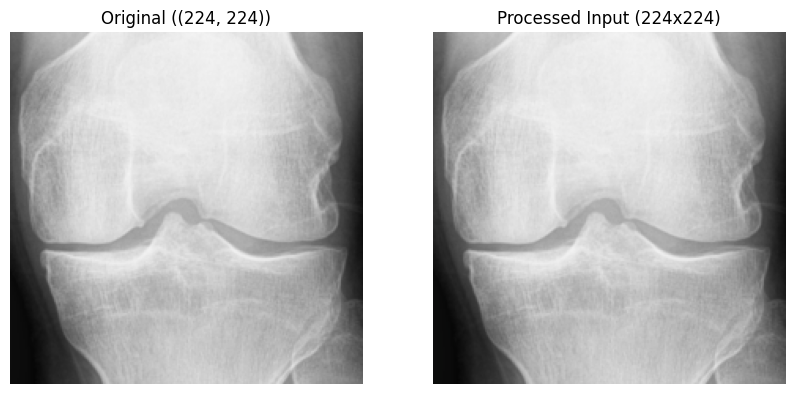

Tensor Shape: torch.Size([3, 224, 224])


In [5]:
# --- 3. Visualize Original vs. Processed Image ---

def show_image_comparison(image_path):
    # 1. Load Raw Image
    # Convert to RGB (ResNet expects 3 channels, even if X-ray is grayscale)
    img_raw = Image.open(image_path).convert('RGB')
    
    # 2. Apply Transforms
    img_tensor = preprocess_transform(img_raw)
    
    # 3. Prepare Tensor for Display (Un-normalize for visualization)
    # We reverse the normalization: image = tensor * std + mean
    img_display = img_tensor.permute(1, 2, 0).numpy() # Move channels to last (C,H,W -> H,W,C)
    img_display = img_display * np.array(std) + np.array(mean)
    img_display = np.clip(img_display, 0, 1) # Clip values to valid range
    
    # 4. Plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot Original
    axes[0].imshow(img_raw)
    axes[0].set_title(f"Original ({img_raw.size})")
    axes[0].axis('off')
    
    # Plot Processed (what the model sees)
    axes[1].imshow(img_display)
    axes[1].set_title(f"Processed Input ({IMG_SIZE}x{IMG_SIZE})")
    axes[1].axis('off')
    
    plt.show()
    print(f"Tensor Shape: {img_tensor.shape}")

# Test on a random image if available
if len(image_files) > 0:
    # Pick a random image
    random_img_path = np.random.choice(image_files)
    show_image_comparison(random_img_path)
else:
    print("No images found to visualize.")

In [6]:
from torch.utils.data import Dataset

class TriModalDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame with 'ID', 'Knee_Side', 'event', 'time', etc.
            image_dir (str): Path to root image directory.
            transform (callable, optional): Transform to be applied on a sample.
        """
        self.df = dataframe
        self.image_dir = image_dir
        self.transform = transform
        
        # Prepare lists for fast access
        self.ids = self.df['ID'].values
        self.sides = self.df['Knee_Side'].values
        
        # NOTE: In real OAI data, you'll need logic to map ID -> Filename.
        # For this Sandbox, we might just assume filenames match IDs or are listed in the DF.
        # Placeholder logic:
        # self.filenames = self.df['Filename'].values 

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # 1. Get Image Path (Placeholder logic - adapt to your sandbox filenames)
        # img_name = self.filenames[idx]
        # img_path = os.path.join(self.image_dir, img_name)
        
        # 2. Load Image
        # image = Image.open(img_path).convert('RGB')
        # if self.transform:
        #     image = self.transform(image)
            
        # 3. Get Tabular Features (Wide)
        # wide_features = ... (Load from DF)
        
        # 4. Get Target
        # event = ...
        # time = ...
        
        return {
            # 'image': image,
            # 'wide': wide_features,
            # 'event': event,
            # 'time': time
        }

print("Dataset class structure defined (Logic to be finalized based on Sandbox file naming).")

Dataset class structure defined (Logic to be finalized based on Sandbox file naming).
